## EDA : data visualization, descriptive statistics, pattern recognition

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### To Generate Summary like Avg(mena, median ,mode) and Standard Deviation, min-max


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Summary statistics - categorical features
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


### Finding and treati

In [10]:
# Check missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Handle missing values
df['Age'] = df['Age'].fillna(df['Age'].median()) 
df['Fare'] = df.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))
# Cabin → extract Deck
df['Cabin'] = df['Cabin'].astype(str)
df['Deck'] = df['Cabin'].apply(lambda x: x[0] if x != 'nan' else 'U')

# For categorical columns: mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print("\nMissing values after imputation:")
print(df.isnull().sum())


Missing values after imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Deck           0
dtype: int64


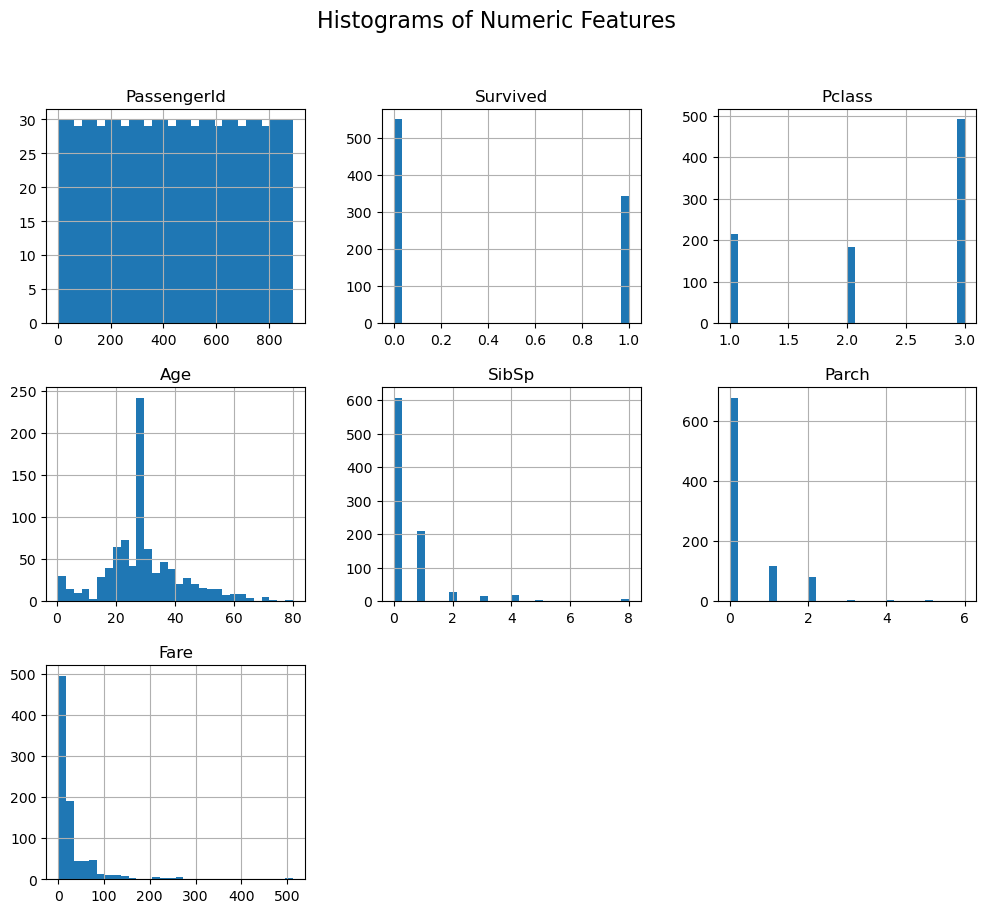

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols].hist(figsize=(12, 10), bins=30)
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.show()

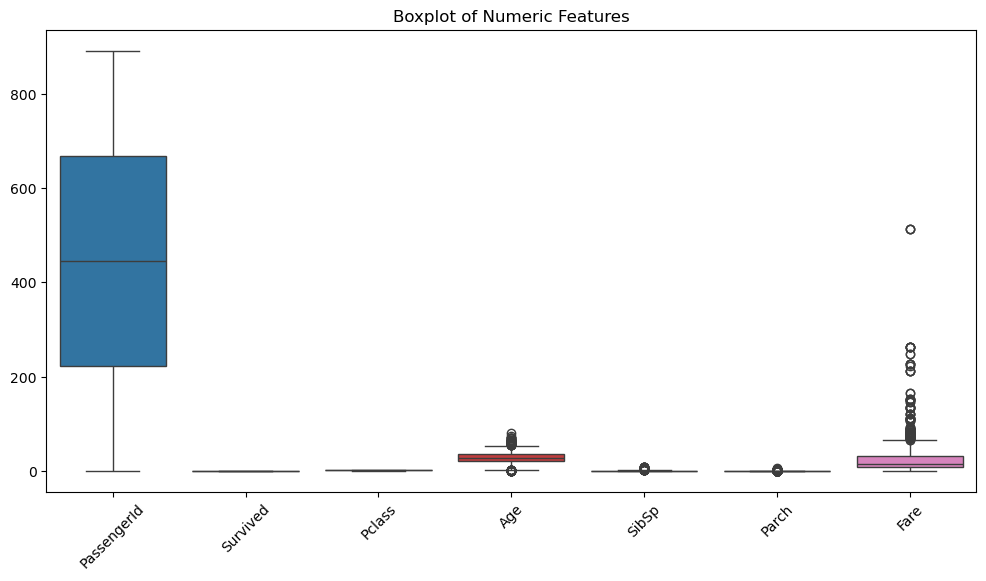

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()


In [21]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

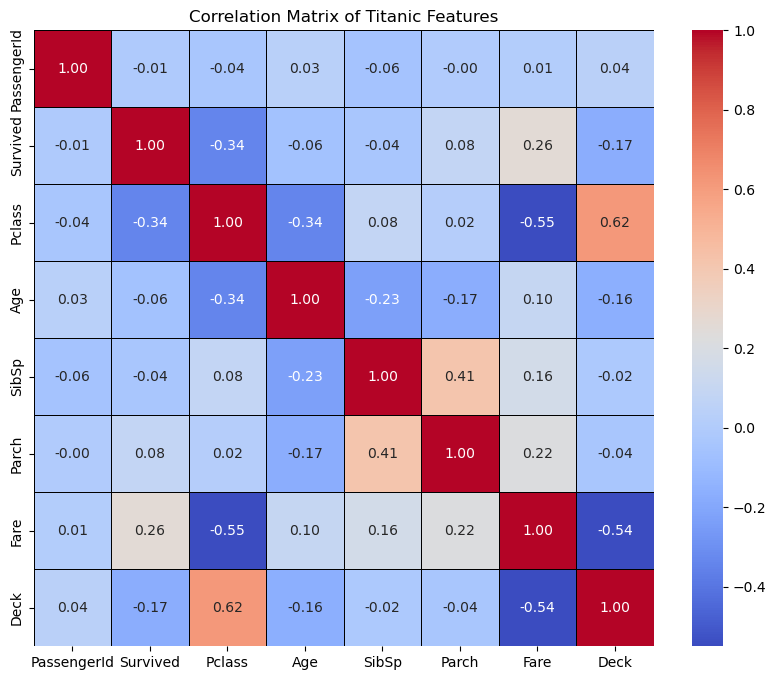

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming the DataFrame is 'df' from your previous steps

# 1. ENCODING/MAPPING: Re-run necessary encodings that might have been missed or overwritten
if 'male' in df['Sex'].astype(str).unique() or 'female' in df['Sex'].astype(str).unique():
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}, na_action='ignore')
    

if 'U' in df['Deck'].astype(str).unique() or 'C' in df['Deck'].astype(str).unique():
    # You need to define how ALL possible Deck letters should be mapped, or convert them 
    # using get_dummies and then drop the original column.
    # For now, let's try to map the most common ones you've been working with:
    deck_map = {'U': 1, 'C': 0} 
    df['Deck'] = df['Deck'].map(deck_map)

columns_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked'] 
# Added 'Embarked' because 'S' is a value in that column

# Drop the columns
df_numeric = df.drop(columns=columns_to_drop, errors='ignore')

try:
    df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')
    df_numeric = df_numeric.dropna(axis=1, how='all') # Drop columns that became all NaN
except Exception:
    pass # Continue if coercion fails

# 4. Compute correlation matrix
corr_matrix = df_numeric.corr()

# 5. Set up the figure and plot
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=.5,
    linecolor='black'
)
plt.title('Correlation Matrix of Titanic Features')
plt.show()

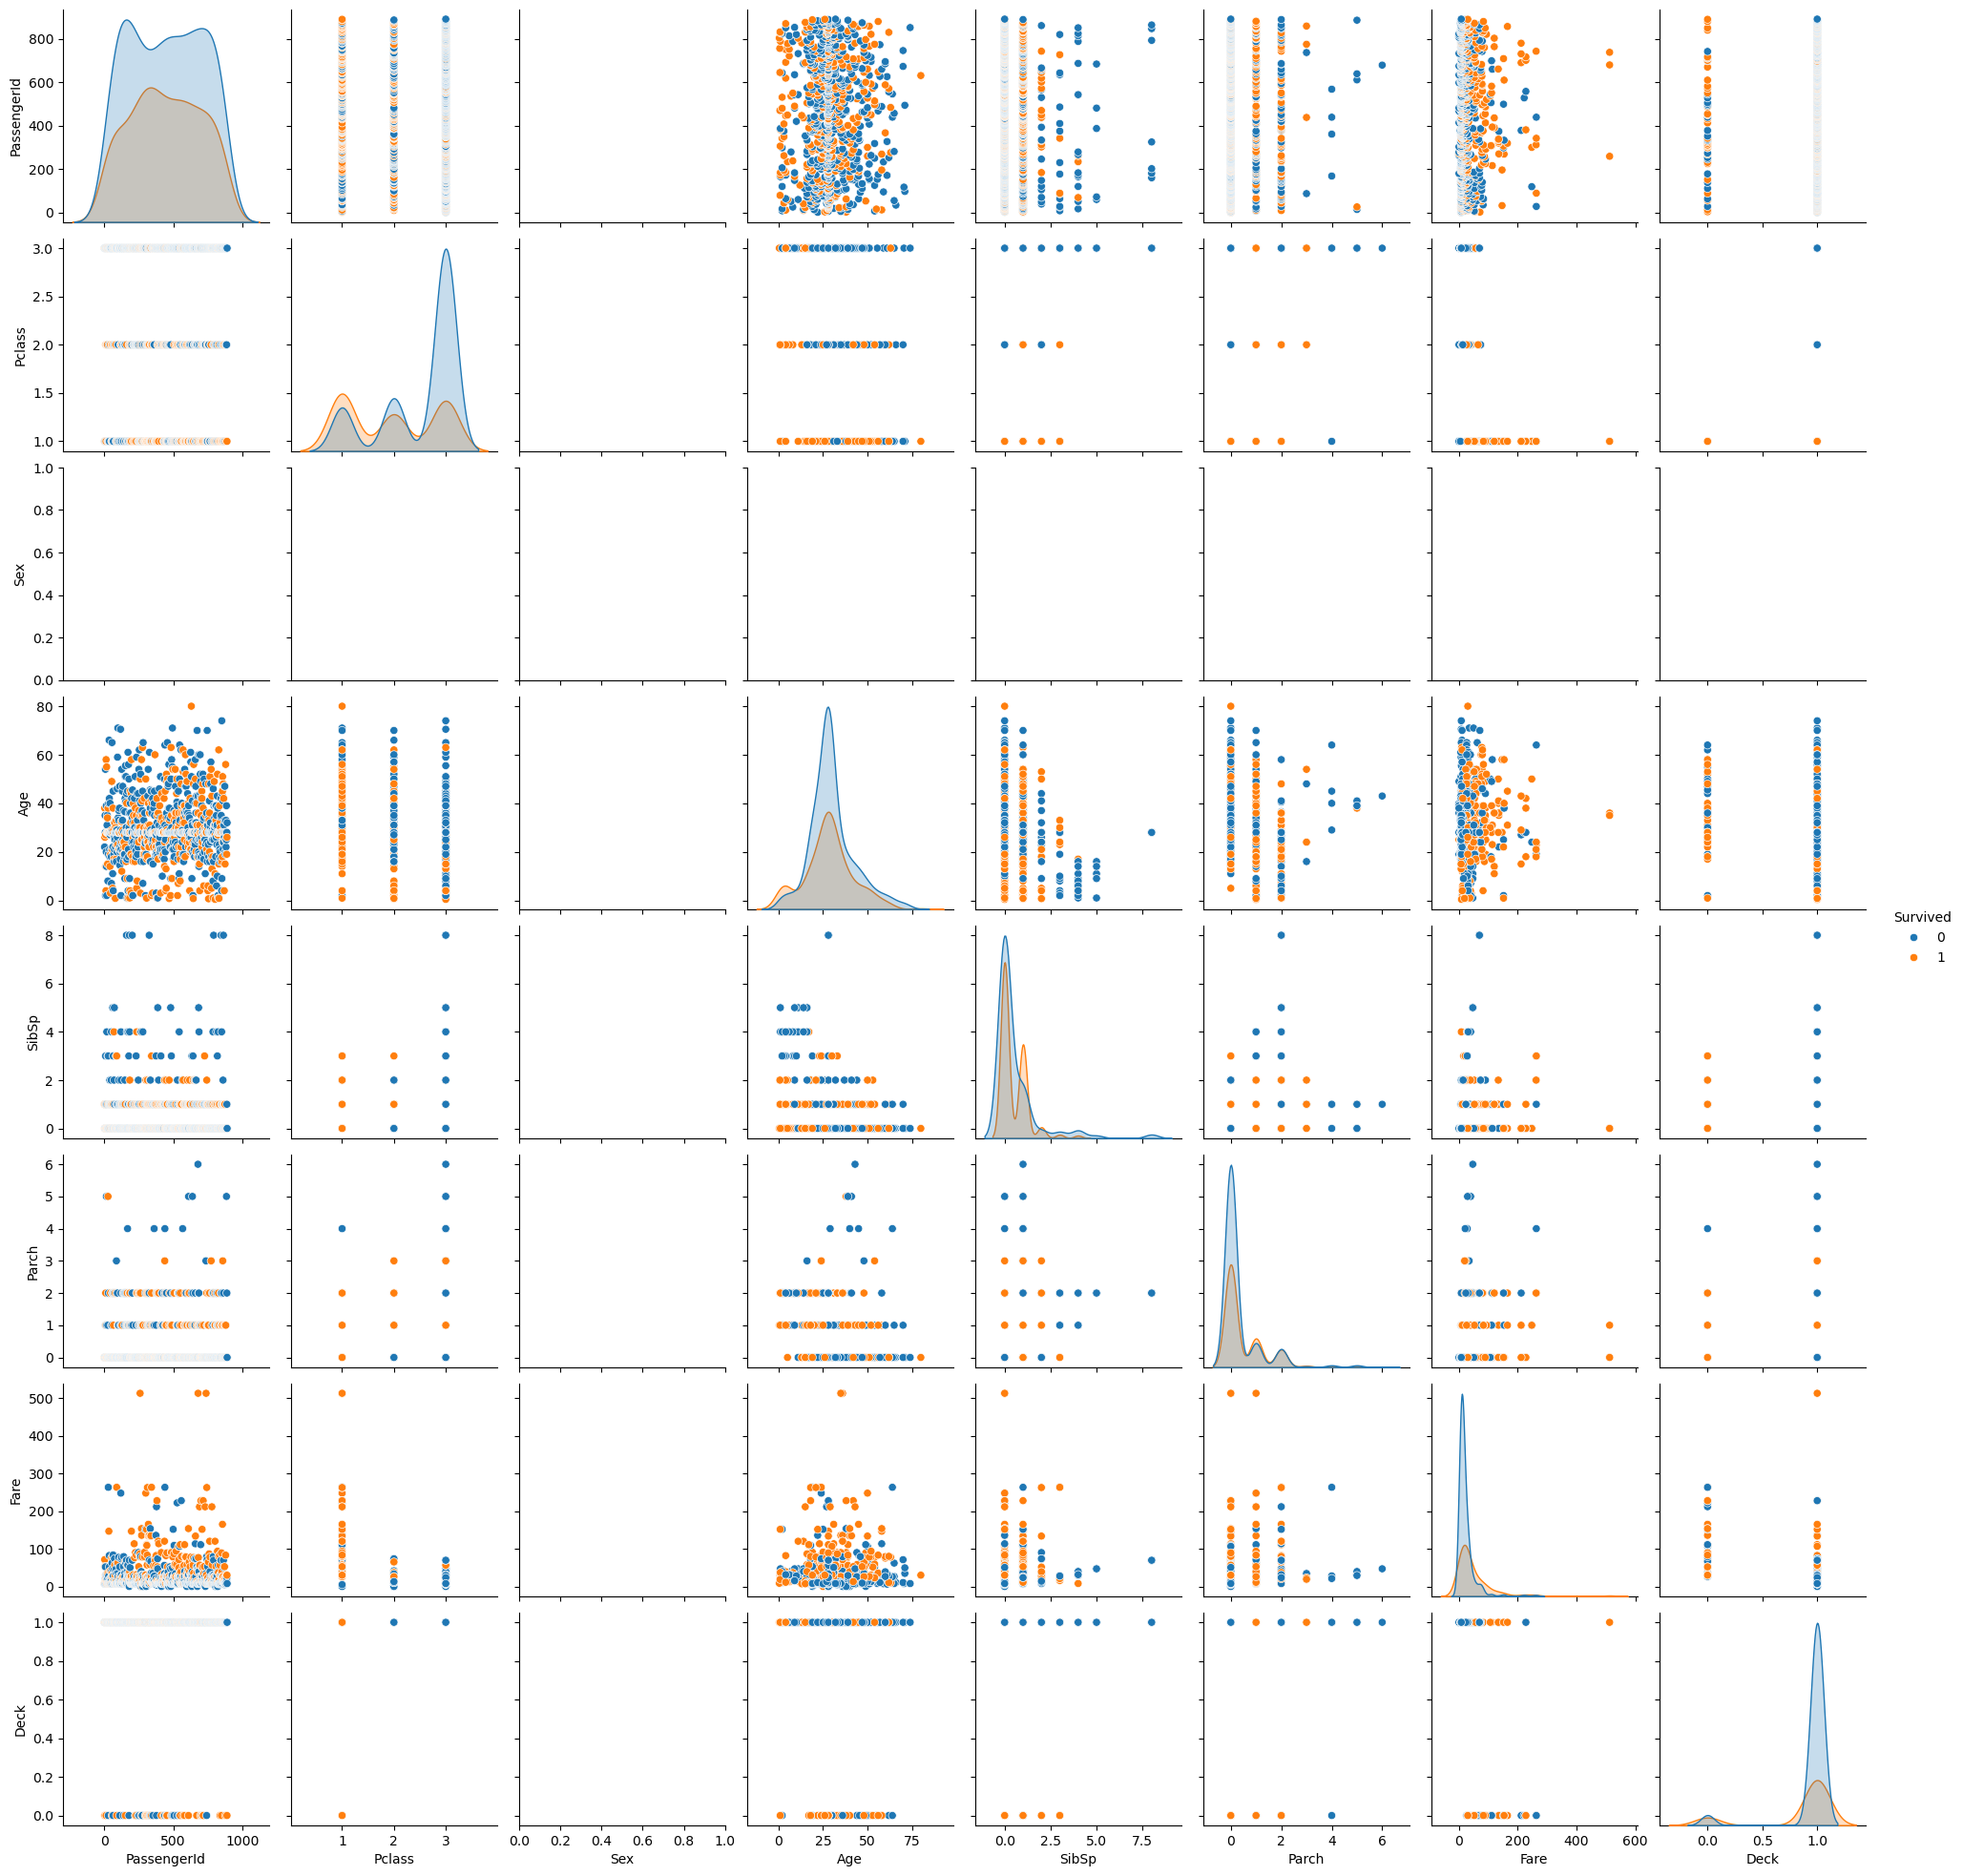

In [26]:
sns.pairplot(df, hue="Survived")
plt.show()

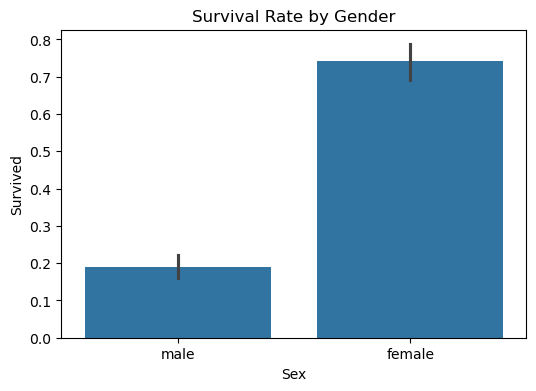

In [28]:
df1 = pd.read_csv("Titanic-Dataset.csv")
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df1)
plt.title("Survival Rate by Gender")
plt.show()

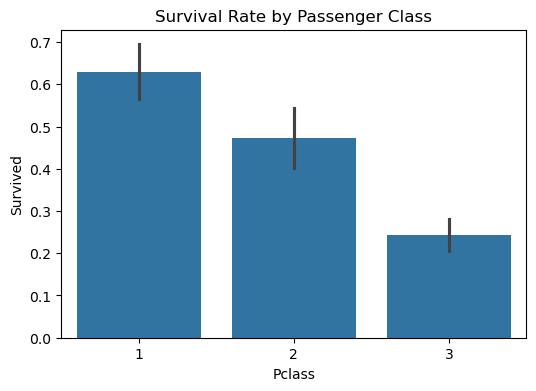

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df1)
plt.title("Survival Rate by Passenger Class")
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_10432\3195143673.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df1, x="Age", hue="Survived", shade=True)


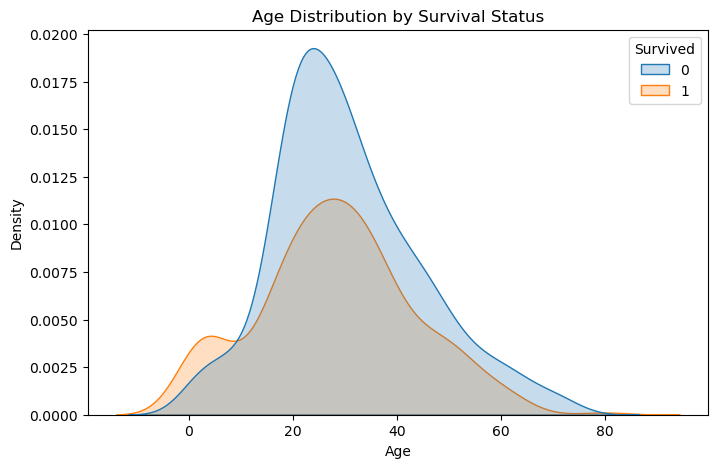

In [30]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df1, x="Age", hue="Survived", shade=True)
plt.title("Age Distribution by Survival Status")
plt.show()